# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span>O objetivo deste projeto é desenvolver um modelo preditivo que possa estimar a renda dos indivíduos com base em características demográficas e socioeconômicas.</span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span>Os dados disponíveis incluem informações demográficas, posse de bens, e dados relacionados a família. As limitações incluem a qualidade dos dados e as restrições de privacidade e proteção de dados.
</span>


### Dicionário de dados

<span>A descrição detalhada dos dados contidos na base encontra-se abaixo</span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência de coleta das variáveis         | Quantitativa - Contínua|
| id_cliente              |  Código de identificação do cliente                 | Qualitativa - Nominal|
| sexo                    |  Sexo do cliente                                    | Qualitativa - Nominal|
| posse_de_veiculo        |  Indica se o cliente possui veículo                 | Qualitativa - Nominal|
| posse_de_imovel         |  Indica se o cliente possui imóvel                  | Qualitativa - Nominal|
| qtd_filhos              |  Quantidade de filhos do cliente                    | Quantitativa - Discreta|
| tipo_renda              |  Tipo de renda do cliente                           | Qualitativa - Nominal|
| educacao                |  Grau de instrução do cliente                       | Qualitativa - Ordinal|
| estado_civil            |  Estado civil do cliente                            | Qualitativa - Nominal|
| tipo_residencia         |  Tipo de residência do cliente (própria, alugada etc)| Qualitativa - Nominal|
| idade                   |  Idade do cliente                                   | Quantitativa - Discreta|
| tempo_emprego           |  Tempo no emprego atual                             | Quantitativa - Contínua|
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência      | Quantitativa - Discreta|
| renda                   |  Renda em reais                                     | Quantitativa - Contínua|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [26]:
renda_original = pd.read_csv('./input/previsao_de_renda.csv')

In [27]:
renda_original.shape

(15000, 15)

In [28]:
renda_original.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [29]:
renda_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [30]:
renda_original.describe()

,Unnamed: 0,id_cliente,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,15000.000000,15000.000000,15000.000000,15000.000000,12427.000000,15000.000000,15000.000000
mean,7499.500000,8304.871400,0.432333,43.882333,7.722635,2.206400,5697.287057
std,4330.271354,4797.780446,0.746631,11.273155,6.711189,0.909792,8266.816289
min,0.000000,1.000000,0.000000,22.000000,0.117808,1.000000,118.710000
25%,3749.750000,4181.000000,0.000000,34.000000,2.973973,2.000000,2026.110000
50%,7499.500000,8297.000000,0.000000,43.000000,6.013699,2.000000,3499.720000
75%,11249.250000,12403.000000,1.000000,53.000000,10.120548,3.000000,6392.167500
max,14999.000000,16649.000000,14.000000,68.000000,42.906849,15.000000,245141.670000


In [31]:
renda_original.isna().sum()

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [32]:
renda_original.nunique()

Unnamed: 0               15000
data_ref                    15
id_cliente                9845
sexo                         2
posse_de_veiculo             2
posse_de_imovel              2
qtd_filhos                   8
tipo_renda                   5
educacao                     5
estado_civil                 5
tipo_residencia              6
idade                       47
tempo_emprego             2589
qt_pessoas_residencia        9
renda                     9786
dtype: int64

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [33]:
# prof = ProfileReport(renda, explorative=True, minimal=True)
# prof


In [34]:
# prof.to_file('./output/renda_analisys.html')

In [35]:
renda_original_columns = renda_original.columns.to_list()
renda_original_columns.remove('data_ref')
for item in renda_original_columns:
    if renda_original[item].dtype == object:
        print(renda_original.groupby([item]).size())
        print("-"*50)

sexo
F    10119
M     4881
dtype: int64
--------------------------------------------------
tipo_renda
Assalariado         7633
Bolsista               9
Empresário          3508
Pensionista         2582
Servidor público    1268
dtype: int64
--------------------------------------------------
educacao
Primário                165
Pós graduação            26
Secundário             8895
Superior completo      5335
Superior incompleto     579
dtype: int64
--------------------------------------------------
estado_civil
Casado      10534
Separado      879
Solteiro     1798
União        1078
Viúvo         711
dtype: int64
--------------------------------------------------
tipo_residencia
Aluguel            194
Casa             13532
Com os pais        675
Comunitário         64
Estúdio             83
Governamental      452
dtype: int64
--------------------------------------------------


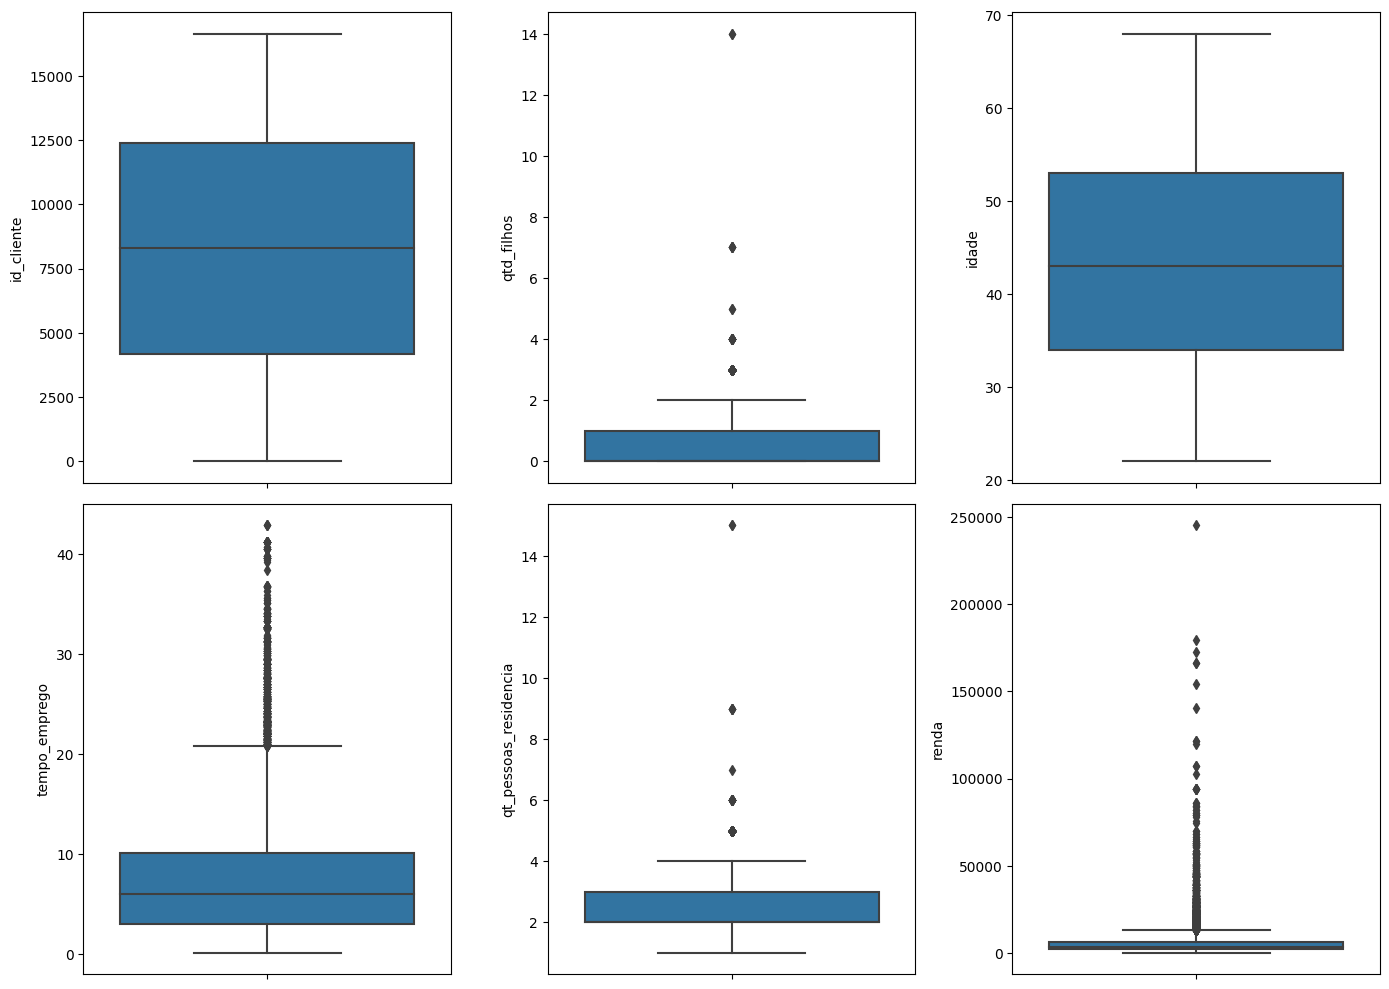

In [36]:
variaveis_numericas = []
for i in renda_original.columns[1:24].tolist():
        if renda_original.dtypes[i] == 'int64' or renda_original.dtypes[i] == 'float64':             
            variaveis_numericas.append(i)
            
plt.rcParams["figure.figsize"] = [14.00, 10.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 3)

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = renda_original, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show()

### Entendimento dos dados - Bivariadas




In [37]:
renda_classificada = renda_original.copy()
salario_minimo = 1_412
# renda_classificada = (
#     renda_classificada.assign(quant_salario_min = lambda x: round(x['renda'] / salario_minimo))
# )
renda_classificada["quant_salario_min"] = round(renda_classificada['renda'] / salario_minimo)
bins = [-100, 0, 3, 6, 10, 20]
labels = [
    "0 a 3 salarios",
    "3 a 6 salarios",
    "6 a 10 salarios",
    "10 a 20 salarios",
    "mais 20 salarios"
]
renda_classificada['cat_quant_salario'] = pd.cut(renda_classificada['quant_salario_min'], bins=bins, labels=labels)

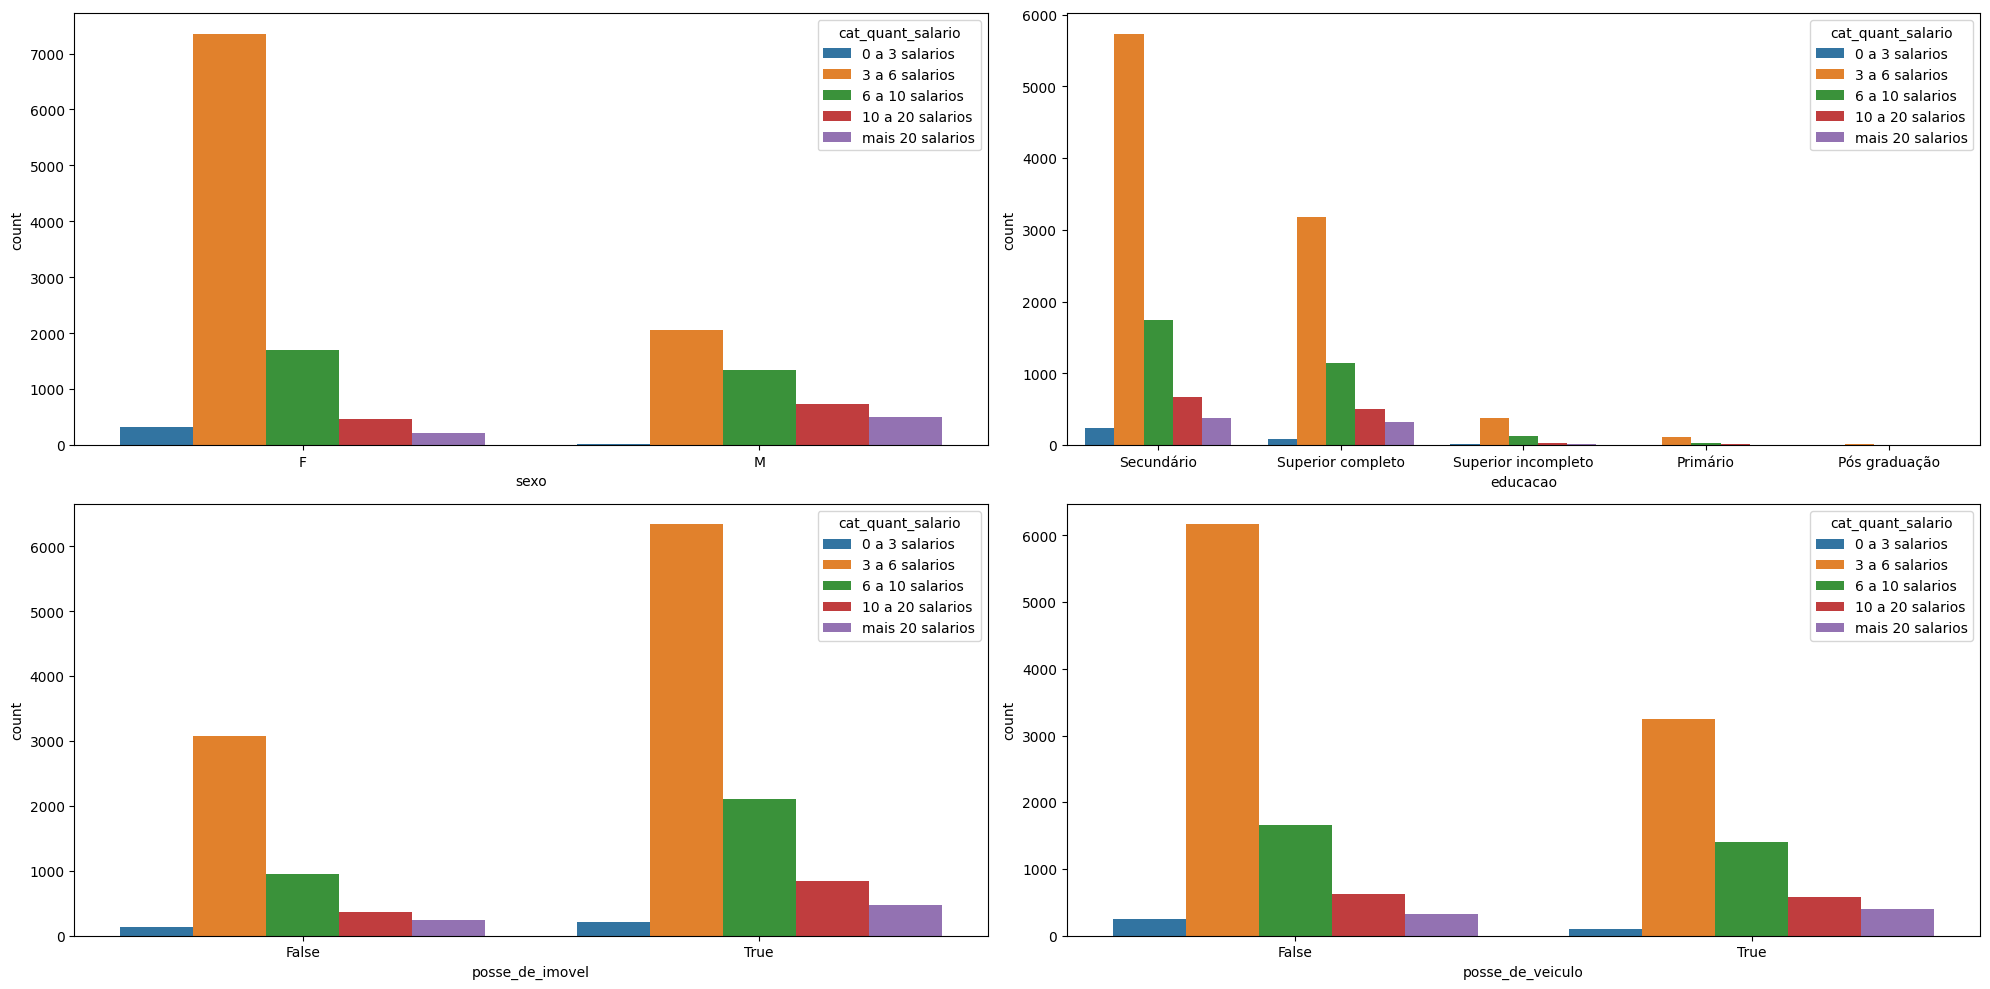

In [38]:
plt.rcParams["figure.figsize"] = [20.00, 10.0]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)
sns.countplot(data = renda_classificada, x = "sexo", hue = "cat_quant_salario", ax=axes[0, 0])
sns.countplot(data = renda_classificada, x = "educacao", hue = "cat_quant_salario", ax=axes[0, 1])
sns.countplot(data = renda_classificada, x = "posse_de_imovel", hue = "cat_quant_salario", ax=axes[1, 0])
sns.countplot(data = renda_classificada, x = "posse_de_veiculo", hue = "cat_quant_salario", ax=axes[1, 1])
plt.show()

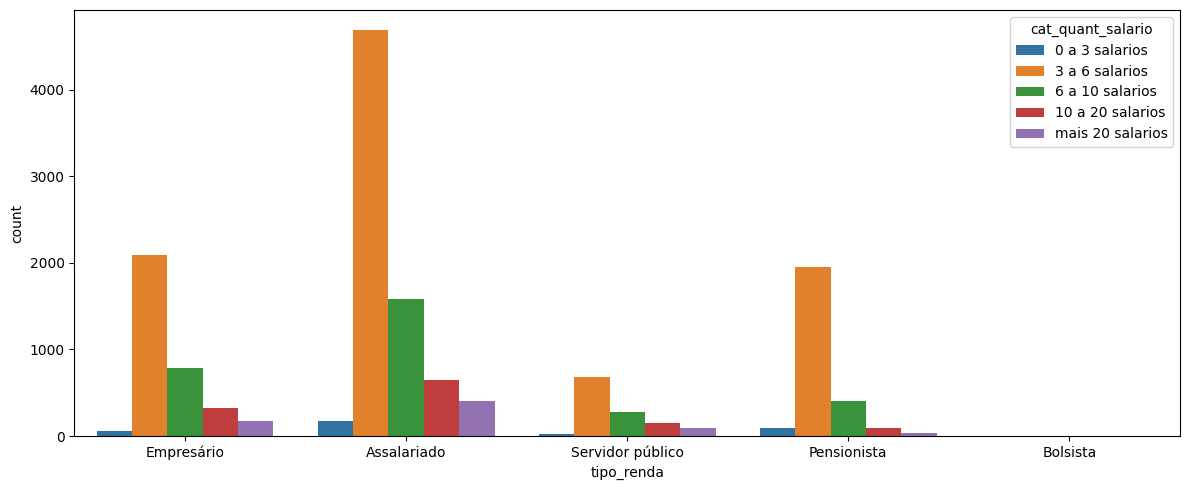

In [39]:
plt.rcParams["figure.figsize"] = [12.00, 5.0]
plt.rcParams["figure.autolayout"] = True
sns.countplot(data = renda_classificada, x = "tipo_renda", hue = "cat_quant_salario")
plt.show()

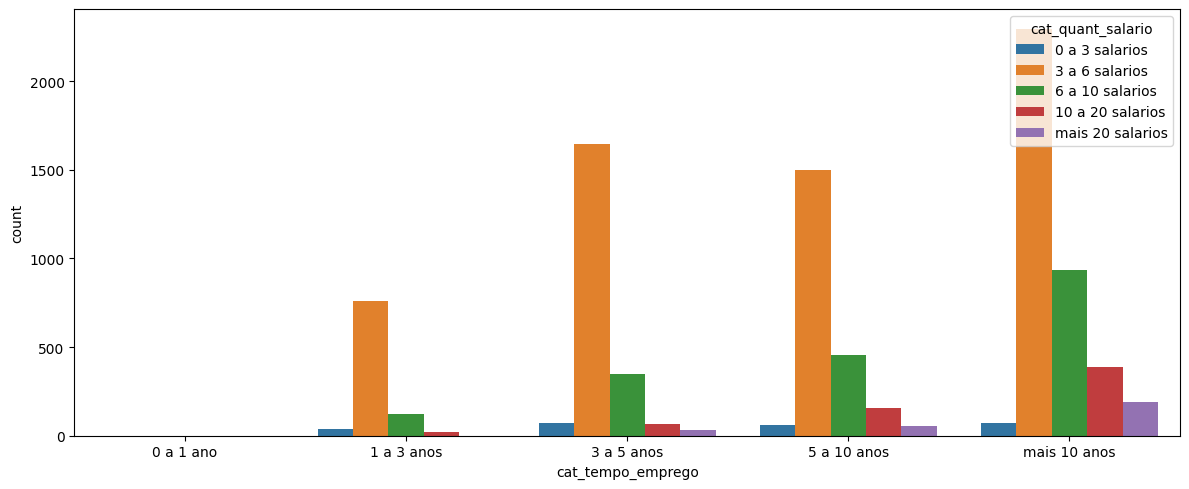

In [40]:
bins = [-100, 0, 1, 3, 5, 10]
labels = [
    "0 a 1 ano",
    "1 a 3 anos",
    "3 a 5 anos",
    "5 a 10 anos",
    "mais 10 anos"
]
renda_classificada['cat_tempo_emprego'] = pd.cut(renda_classificada['tempo_emprego'], bins=bins, labels=labels)

plt.rcParams["figure.figsize"] = [12.00, 5.0]
plt.rcParams["figure.autolayout"] = True
sns.countplot(data = renda_classificada, x = "cat_tempo_emprego", hue = "cat_quant_salario")
plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [41]:
renda_original_columns

['Unnamed: 0',
 'id_cliente',
 'sexo',
 'posse_de_veiculo',
 'posse_de_imovel',
 'qtd_filhos',
 'tipo_renda',
 'educacao',
 'estado_civil',
 'tipo_residencia',
 'idade',
 'tempo_emprego',
 'qt_pessoas_residencia',
 'renda']

In [42]:
columns = [
    'sexo',
    'posse_de_veiculo',
    'posse_de_imovel',
    'qtd_filhos',
    'tipo_renda',
    'educacao',
    'estado_civil',
    'tipo_residencia',
    'idade',
    'tempo_emprego',
    'qt_pessoas_residencia',
    'renda'
]
renda_original = pd.DataFrame(renda_original, columns=columns)
renda_original.columns.to_list()

['sexo',
 'posse_de_veiculo',
 'posse_de_imovel',
 'qtd_filhos',
 'tipo_renda',
 'educacao',
 'estado_civil',
 'tipo_residencia',
 'idade',
 'tempo_emprego',
 'qt_pessoas_residencia',
 'renda']

In [43]:
renda_tempo_emprego_na = renda_original.loc[renda_original['tempo_emprego'].isna()]
renda_tempo_emprego_na.describe()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,2573.000000,2573.000000,0.0,2573.000000,2573.000000
mean,0.041197,59.375049,NaN,1.738049,3672.392623
std,0.241201,5.009364,NaN,0.536913,3428.610508
min,0.000000,26.000000,NaN,1.000000,222.870000
25%,0.000000,57.000000,NaN,1.000000,1698.970000
50%,0.000000,60.000000,NaN,2.000000,2777.150000
75%,0.000000,63.000000,NaN,2.000000,4375.930000
max,3.000000,68.000000,NaN,4.000000,61222.320000


Como é possível ver no campo acima, apesar de um grupo de dados não possuir tempo_emprego, as outras colunas possuem dados úteis, logo, substituir os dados faltantes pela média de tempo_emprego permitirá o aproveitamento dessas linhas na tabela.

In [44]:
renda_original['tempo_emprego'] = renda_original['tempo_emprego'].fillna((renda_original['tempo_emprego'].median()))

É necessário remover alguns outliers

In [45]:
renda_original.shape

(15000, 12)

In [49]:
renda_original = renda_original.loc[renda_original['qtd_filhos'] <= 2]
renda_original = renda_original.loc[renda_original['qt_pessoas_residencia'] <= 4]
renda_original = renda_original.loc[renda_original['renda'] <= 100_000]
renda_original = renda_original.loc[renda_original['tempo_emprego'] <= 38]
renda_original.shape

(14734, 12)

In [50]:
renda_original_dummies = pd.get_dummies(renda_original, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)

In [53]:
renda_original_dummies.head(1).to_dict()

{'posse_de_veiculo': {0: False},
 'posse_de_imovel': {0: True},
 'qtd_filhos': {0: 0},
 'idade': {0: 26},
 'tempo_emprego': {0: 6.602739726027397},
 'qt_pessoas_residencia': {0: 1.0},
 'renda': {0: 8060.34},
 'sexo_M': {0: False},
 'tipo_renda_Bolsista': {0: False},
 'tipo_renda_Empresário': {0: True},
 'tipo_renda_Pensionista': {0: False},
 'tipo_renda_Servidor público': {0: False},
 'educacao_Pós graduação': {0: False},
 'educacao_Secundário': {0: True},
 'educacao_Superior completo': {0: False},
 'educacao_Superior incompleto': {0: False},
 'estado_civil_Separado': {0: False},
 'estado_civil_Solteiro': {0: True},
 'estado_civil_União': {0: False},
 'estado_civil_Viúvo': {0: False},
 'tipo_residencia_Casa': {0: True},
 'tipo_residencia_Com os pais': {0: False},
 'tipo_residencia_Comunitário': {0: False},
 'tipo_residencia_Estúdio': {0: False},
 'tipo_residencia_Governamental': {0: False}}

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:red">ESCREVER AQUI</span>


### Rodando o modelo


<span style="color:red">ESCREVER AQUI</span>


## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.